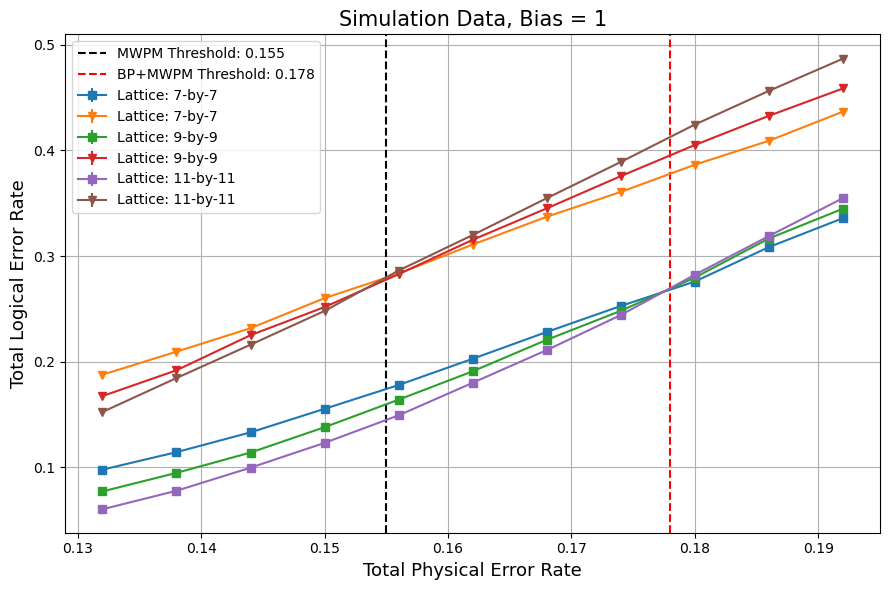

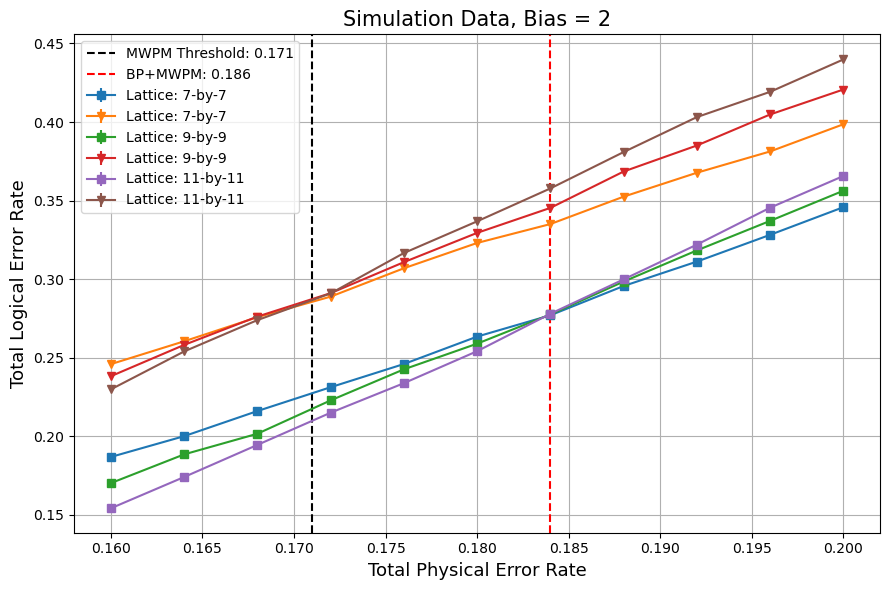

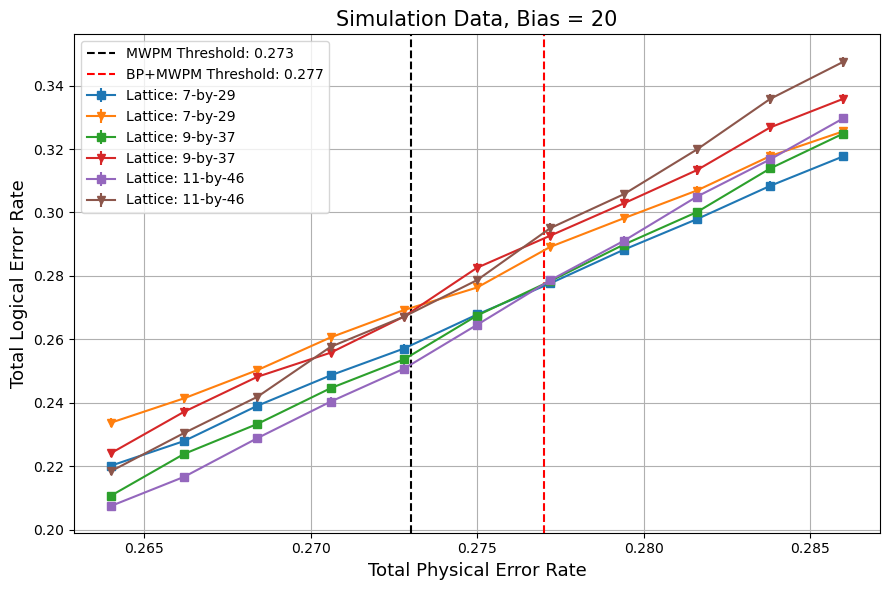

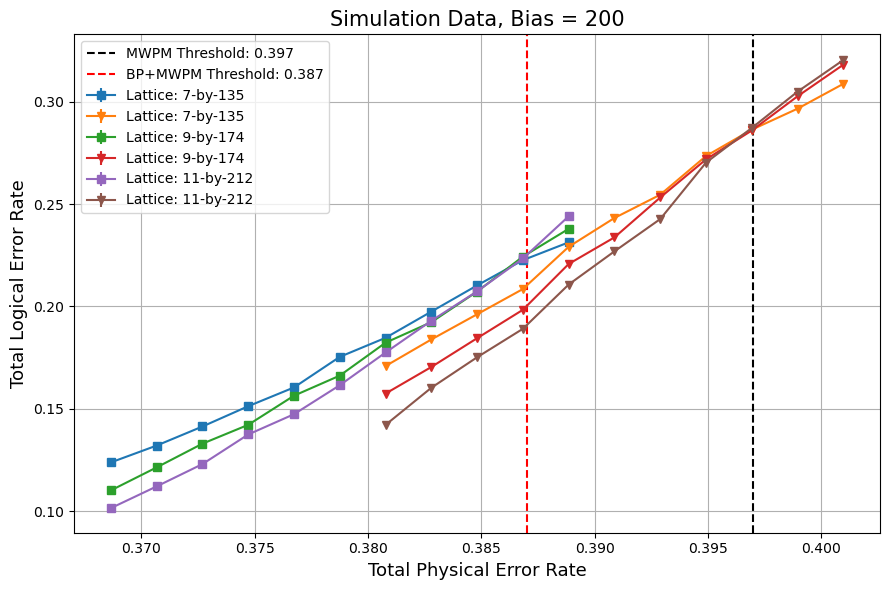

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
wo = pd.read_csv('bp+mwpm.csv')
wo2 = pd.read_csv('mwpm.csv')
eta = [1, 2, 20, 200]
factor = [1, 1, 4.143, 19.286]

for i in range(0,12,3):
    plt.figure(figsize=(9, 6))
    for j in range(i,i+3):
        if eta[int(i/3)] == 0:
            prob = np.array(wo['pz'])[j*11:(j+1)*11]
            log = np.array(wo['log'])[j*11:(j+1)*11]
            err = np.array(wo['err'])[j*11:(j+1)*11]

            prob2 = np.array(wo2['pz'])[j*11:(j+1)*11]
            log2 = np.array(wo2['log'])[j*11:(j+1)*11]
            err2 = np.array(wo2['err'])[j*11:(j+1)*11]
        else:
            prob = np.array(wo['pz'])[j*11:(j+1)*11]*(1+2/eta[int(i/3)])
            log = np.array(wo['log'])[j*11:(j+1)*11]
            err = np.array(wo['err'])[j*11:(j+1)*11]

            prob2 = np.array(wo2['pz'])[j*11:(j+1)*11]*(1+2/eta[int(i/3)])
            log2 = np.array(wo2['log'])[j*11:(j+1)*11]
            err2 = np.array(wo2['err'])[j*11:(j+1)*11]

        plt.errorbar(prob, log, yerr=err, marker='s', label="Lattice: %d-by-%d" % (int((j-i)*2+7), round(factor[int(i/3)] * int((j-i)*2+7))))
        plt.errorbar(prob2, log2, yerr=err2, marker='v', label="Lattice: %d-by-%d" % (int((j-i)*2+7), round(factor[int(i/3)] * int((j-i)*2+7))))
        
    if eta[int(i/3)] == 1:
        plt.axvline(x=0.155, label='MWPM Threshold: {}'.format(0.155), color='k', linestyle="--")
    if eta[int(i/3)] == 2:
        plt.axvline(x=0.171, label='MWPM Threshold: {}'.format(0.171), color='k', linestyle="--")
    if eta[int(i/3)] == 20:
        plt.axvline(x=0.273, label='MWPM Threshold: {}'.format(0.273), color='k', linestyle="--") 
    if eta[int(i/3)] == 200:
        plt.axvline(x=0.397, label='MWPM Threshold: {}'.format(0.397), color='k', linestyle="--") 
        
    if eta[int(i/3)] == 1:
        plt.axvline(x=0.178, label='BP+MWPM Threshold: {}'.format(0.178), color='r', linestyle="--")
    if eta[int(i/3)] == 2:
        plt.axvline(x=0.184, label='BP+MWPM: {}'.format(0.186), color='r', linestyle="--")
    if eta[int(i/3)] == 20:
        plt.axvline(x=0.277, label='BP+MWPM Threshold: {}'.format(0.277), color='r', linestyle="--") 
    if eta[int(i/3)] == 200:
        plt.axvline(x=0.387, label='BP+MWPM Threshold: {}'.format(0.387), color='r', linestyle="--") 
    
    plt.xlabel("Total Physical Error Rate", fontsize=13)
    plt.ylabel("Total Logical Error Rate", fontsize=13)
    plt.grid("True")
#     plt.yscale("log")
    plt.title("Simulation Data, Bias = %d" % eta[int(i/3)], fontsize=15)
    plt.legend()
    plt.tight_layout()
#     if eta[int(i/3)] == 1 or eta[int(i/3)] == 2 or eta[int(i/3)] == 20 or eta[int(i/3)] == 200:
#         plt.savefig('final_result_%d.png' % (eta[int(i/3)]))
    plt.show()